In [147]:
from pylab import*
from matplotlib import*
from scipy import*
from scipy import interpolate
from scipy.misc import derivative

In [148]:
data = np.loadtxt('cmb_derivada.txt').T
xk=data[0]
fxk=data[1]
dfxk=data[2]
rel=(xk,fxk,dfxk)

In [149]:
def interp(x,x_i,y_i):
    L = []
    a = []
    for k in range(len(x_i)):
        numer = np.ones(len(x))
        denom = np.ones(len(x))
        for i in range(len(x_i)):
            if i != k:
                a = x - x_i[i]
                numer = a*numer 
                b = x_i[k] - x_i[i]
                denom = b*denom   
        L.append(np.divide(numer,denom))
    ac = np.zeros(len(L[0]))
    for k in range(len(y_i)):
        ac = ac + L[k]*y_i[k]
    return ac

In [150]:
x = np.linspace(np.min(xk),np.max(xk),10000)
O = interp(x,xk,fxk)
P = interpolate.lagrange(xk,dfxk)
A = P(x)
S = interpolate.lagrange(xk, fxk)
D = S(x)

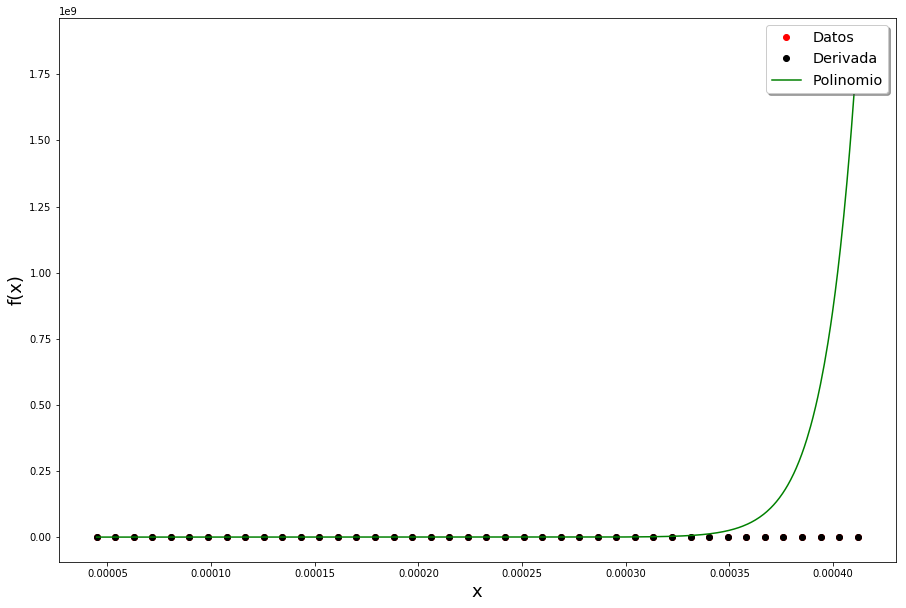

In [151]:
plt.figure(figsize=(15,10))
plt.plot(xk,fxk,'ro',label='Datos')
plt.plot(xk,dfxk,'ko',label='Derivada')
#plt.plot(x,O,'k-' , label='Polinomio3')
#plt.plot(x,A,'b-' , label='Polinomio2')
plt.plot(x,D,'g-' , label='Polinomio')


plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.ylim(1e-14,1e-12)

plt.show()

In [152]:
her = numpy.polynomial.hermite.hermfit(xk,fxk,3)
print(her)
hera = poly1d(her)
print(hera)

[-3.92628837e-05  8.53604860e-02 -1.96314420e-05  1.42267466e-02]
            3           2
-3.926e-05 x + 0.08536 x - 1.963e-05 x + 0.01423


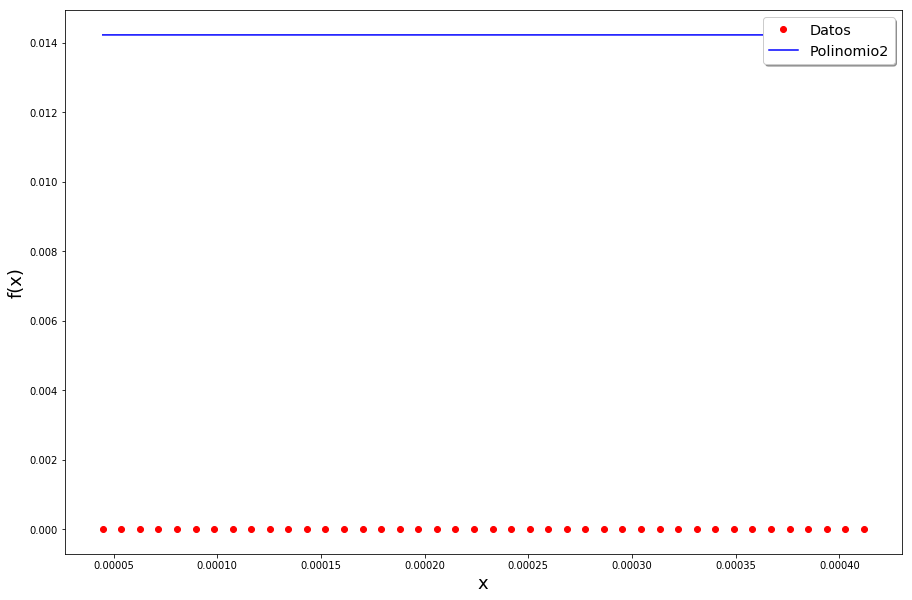

In [153]:
plt.figure(figsize=(15,10))
plt.plot(xk,fxk,'ro',label='Datos')
#plt.plot(xk,dfxk,'ko',label='Derivada')
#plt.plot(x,O,'k-' , label='Polinomio3')
plt.plot(x,hera(x),'b-' , label='Polinomio2')
#plt.plot(x,D,'g-' , label='Polinomio')


plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.ylim(1e-14,1e-12)

plt.show()

In [154]:
her = interpolate.pchip_interpolate(xk, fxk, x)
print(her)
hera = poly1d(her)
print(hera)

[4.96387966e-13 4.96917981e-13 4.97447756e-13 ... 1.43722568e-14
 1.43590649e-14 1.43458726e-14]
           9999             9998             9997            9996
4.964e-13 x    + 4.969e-13 x    + 4.974e-13 x    + 4.98e-13 x   
              9995            9994             9993             9992
 + 4.985e-13 x    + 4.99e-13 x    + 4.996e-13 x    + 5.001e-13 x   
              9991             9990             9989             9988
 + 5.006e-13 x    + 5.011e-13 x    + 5.017e-13 x    + 5.022e-13 x   
              9987             9986             9985             9984
 + 5.027e-13 x    + 5.033e-13 x    + 5.038e-13 x    + 5.043e-13 x   
              9983             9982             9981             9980
 + 5.048e-13 x    + 5.054e-13 x    + 5.059e-13 x    + 5.064e-13 x   
              9979             9978            9977             9976
 + 5.069e-13 x    + 5.075e-13 x    + 5.08e-13 x    + 5.085e-13 x   
             9975             9974             9973             9972
 + 5.09e-13 

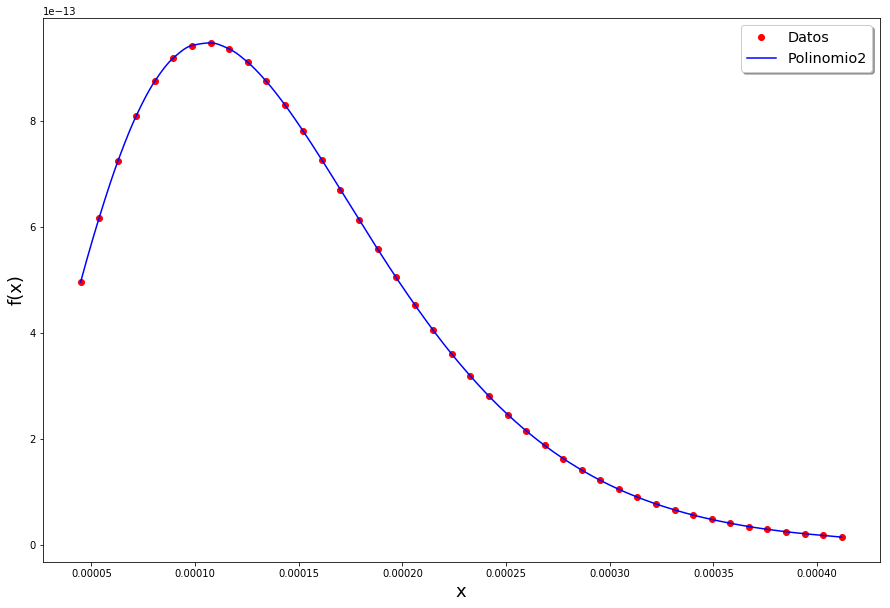

In [155]:
plt.figure(figsize=(15,10))
plt.plot(xk,fxk,'ro',label='Datos')
#plt.plot(xk,dfxk,'ko',label='Derivada')
#plt.plot(x,O,'k-' , label='Polinomio3')
plt.plot(x,hera,'b-' , label='Polinomio2')
#plt.plot(x,D,'g-' , label='Polinomio')


plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
#plt.ylim(1e-14,1e-12)

plt.show()